In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/morgancordray/Documents/DataClass/Project/dm-2/AB_NYC_2019.csv")

In [3]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
dfgroupby = df.groupby(["neighbourhood_group","room_type"]).mean()

In [6]:
dfgroupby = dfgroupby.reset_index()
dfgroupby

,neighbourhood_group,room_type,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,Entire home/apt,2.269787e+07,1.037373e+08,40.848013,-73.880363,127.506596,5.957784,30.678100,2.238123,1.865435,158.000000
1,Bronx,Private room,2.235896e+07,1.060786e+08,40.849158,-73.886172,66.788344,3.858896,25.018405,1.641660,2.338957,171.331288
2,Bronx,Shared room,2.705442e+07,1.123450e+08,40.840873,-73.893407,59.800000,3.366667,7.200000,1.351860,3.416667,154.216667
3,Brooklyn,Entire home/apt,1.730117e+07,4.861704e+07,40.685211,-73.955603,178.327545,6.531332,27.945183,1.317630,1.837849,97.205147
4,Brooklyn,Private room,1.894125e+07,6.242636e+07,40.685513,-73.947150,76.500099,5.539479,21.086952,1.255758,2.547177,99.917983
5,Brooklyn,Shared room,2.358634e+07,1.040423e+08,40.669307,-73.948156,50.527845,7.753027,14.026634,1.070966,6.171913,178.007264
6,Manhattan,Entire home/apt,1.866860e+07,6.557697e+07,40.758266,-73.978402,249.239109,10.539283,17.815516,1.141610,18.922721,117.140996
7,Manhattan,Private room,1.880759e+07,6.982314e+07,40.776002,-73.968506,116.776622,5.446880,26.202706,1.448949,3.188048,101.845026
8,Manhattan,Shared room,2.115615e+07,9.666720e+07,40.770035,-73.971700,88.977083,6.766667,21.400000,1.792781,3.885417,138.572917
9,Queens,Entire home/apt,2.112772e+07,8.713280e+07,40.728993,-73.874459,147.050573,5.369752,28.933206,1.967302,1.677958,132.267176


In [7]:
# give each neighbourhood group its own variable
bronx = dfgroupby[dfgroupby["neighbourhood_group"]=="Bronx"]
Brooklyn = dfgroupby[dfgroupby["neighbourhood_group"]=="Brooklyn"]
Manhattan = dfgroupby[dfgroupby["neighbourhood_group"]=="Manhattan"]
Queens = dfgroupby[dfgroupby["neighbourhood_group"]=="Queens"]
Staten_Island = dfgroupby[dfgroupby["neighbourhood_group"]=="Staten Island"]

In [8]:
bronx

,neighbourhood_group,room_type,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,Entire home/apt,2.269787e+07,1.037373e+08,40.848013,-73.880363,127.506596,5.957784,30.678100,2.238123,1.865435,158.000000
1,Bronx,Private room,2.235896e+07,1.060786e+08,40.849158,-73.886172,66.788344,3.858896,25.018405,1.641660,2.338957,171.331288
2,Bronx,Shared room,2.705442e+07,1.123450e+08,40.840873,-73.893407,59.800000,3.366667,7.200000,1.351860,3.416667,154.216667


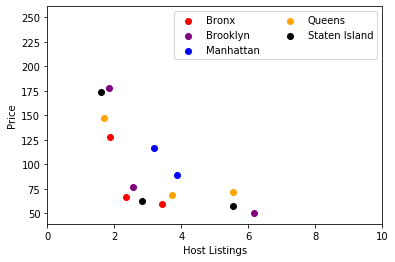

In [9]:
# Plot of Price on Host Listings
bronx_map = plt.scatter(bronx["calculated_host_listings_count"],bronx["price"], color = "red")
brooklyn_map = plt.scatter(Brooklyn["calculated_host_listings_count"],Brooklyn["price"], color = "purple")
Manhattan_map = plt.scatter(Manhattan["calculated_host_listings_count"],Manhattan["price"], color = "blue")
Queens_map = plt.scatter(Queens["calculated_host_listings_count"],Queens["price"], color = "orange")
Staten_Island_map = plt.scatter(Staten_Island["calculated_host_listings_count"],Staten_Island["price"], color = "black")
plt.xlim(0,10)
plt.xlabel("Host Listings")
plt.ylabel("Price")
plt.legend((bronx_map, brooklyn_map, Manhattan_map,Queens_map,Staten_Island_map),
            ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"),
           scatterpoints = 1,
           loc="upper right",
           ncol=2,
           fontsize =10)
plt.show()


TypeError: can't multiply sequence by non-int of type 'list'

<BarContainer object of 3 artists>

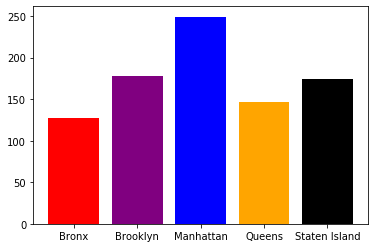

In [12]:
# Bar Chart of prices in each group
plt.bar("Bronx" , bronx["price"], color = "red")
plt.bar("Brooklyn", Brooklyn["price"],color = "purple")
plt.bar("Manhattan", Manhattan["price"], color = "blue")
plt.bar("Queens", Queens["price"], color = "orange")
plt.bar("Staten Island", Staten_Island["price"], color = "black")

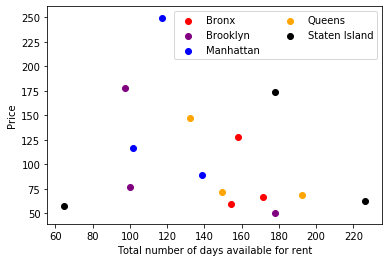

In [13]:
# Plot of Price on Total number of days available for rent
bronx_map = plt.scatter(bronx["availability_365"],bronx["price"], color = "red")
brooklyn_map = plt.scatter(Brooklyn["availability_365"],Brooklyn["price"], color = "purple")
Manhattan_map = plt.scatter(Manhattan["availability_365"],Manhattan["price"], color = "blue")
Queens_map = plt.scatter(Queens["availability_365"],Queens["price"], color = "orange")
Staten_Island_map = plt.scatter(Staten_Island["availability_365"],Staten_Island["price"], color = "black")
plt.xlabel("Total number of days available for rent")
plt.ylabel("Price")
plt.legend((bronx_map, brooklyn_map, Manhattan_map,Queens_map,Staten_Island_map),
            ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"),
           scatterpoints = 1,
           loc="upper right",
           ncol=2,
           fontsize =10)
#z = np.polyfit(bronx["availability_365"], bronx["price"], 1)
#p = np.poly1d(z)
#plt.plot(bronx["availability_365"],p(bronx["availability_365"]),"r--")

Text(0, 0.5, 'Price')

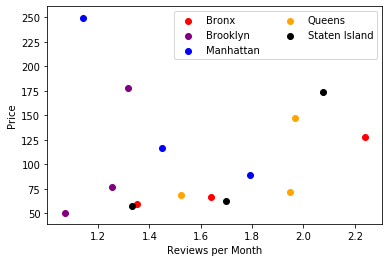

In [14]:
# plot of reviews per month on price
bronx_map = plt.scatter(bronx["reviews_per_month"],bronx["price"], color = "red")
brooklyn_map = plt.scatter(Brooklyn["reviews_per_month"],Brooklyn["price"], color = "purple")
Manhattan_map = plt.scatter(Manhattan["reviews_per_month"],Manhattan["price"], color = "blue")
Queens_map = plt.scatter(Queens["reviews_per_month"],Queens["price"], color = "orange")
Staten_Island_map = plt.scatter(Staten_Island["reviews_per_month"], Staten_Island["price"], color = "black")
plt.legend((bronx_map, brooklyn_map, Manhattan_map,Queens_map,Staten_Island_map),
            ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"),
           scatterpoints = 1,
           loc="upper right",
           ncol=2,
           fontsize =10)
plt.xlabel("Reviews per Month")
plt.ylabel("Price")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

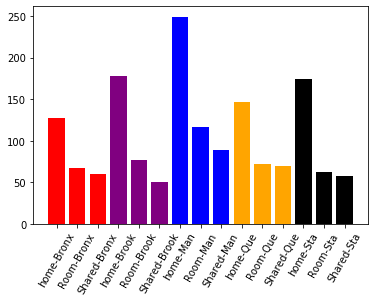

In [15]:
#xticks = ["Private room",]
plt.bar("home-Bronx", bronx["price"][0],color = "red")
plt.bar("Room-Bronx", bronx["price"][1],color = "red")
plt.bar("Shared-Bronx", bronx["price"][2],color = "red")
plt.bar("home-Brook", Brooklyn["price"][3],color = "purple")
plt.bar("Room-Brook", Brooklyn["price"][4],color = "purple")
plt.bar("Shared-Brook", Brooklyn["price"][5],color = "purple")
plt.bar("home-Man" , Manhattan["price"][6],color = "blue")
plt.bar("Room-Man" , Manhattan["price"][7],color = "blue")
plt.bar("Shared-Man" , Manhattan["price"][8],color = "blue")
plt.bar("home-Que" , Queens["price"][9],color = "orange")
plt.bar("Room-Que" , Queens["price"][10],color = "orange")
plt.bar("Shared-Que" , Queens["price"][11],color = "orange")
plt.bar("home-Sta" , Staten_Island["price"][12],color = "black")
plt.bar("Room-Sta" , Staten_Island["price"][13],color = "black")
plt.bar("Shared-Sta" , Staten_Island["price"][14],color = "black")
#plt.figure(figsize=(30,30))
plt.xticks(rotation=60)
#plt.tight_layout()

In [16]:
Brooklyn["price"]

3    178.327545
4     76.500099
5     50.527845
Name: price, dtype: float64

In [17]:
Manhattan["price"]

6    249.239109
7    116.776622
8     88.977083
Name: price, dtype: float64

In [18]:
manhattan_df = df[df["neighbourhood_group"] == "Manhattan"]

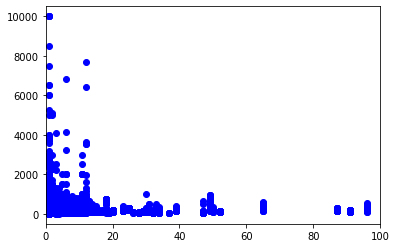

In [71]:
# Does Lower Prices Cause greater number of listings
plt.scatter(manhattan_df["calculated_host_listings_count"],manhattan_df["price"], color = "blue")
plt.xlim(0,100)
#plt.ylim(0,4000)
plt.show()


In [59]:
bins = [0,50,100,150,200,250,300,350,400]
bin_labels = ["0-50","50-100","100-150","150-200","200-250","250-300","300-350","350-400"]
xticks = "Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"
df_cut= pd.cut(df["calculated_host_listings_count"], bins, labels=bin_labels)
df["h_listing_bins"] = df_cut
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,h_listing_bins
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0-50
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0-50
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0-50
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0-50
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,0-50
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,0-50
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,0-50
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,0-50


In [53]:
gbroom_df = df.groupby(["room_type"]).mean()

In [54]:
gbroom_df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
Private room,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
Shared room,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


<BarContainer object of 1 artists>

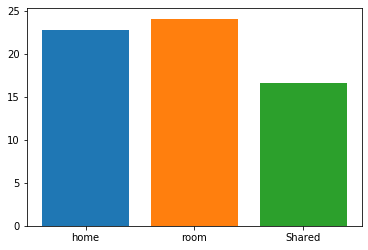

In [57]:
plt.bar("home", gbroom_df["number_of_reviews"][0])
plt.bar("room", gbroom_df["number_of_reviews"][1])
plt.bar("Shared", gbroom_df["number_of_reviews"][2])

bins_groupby_df = df.groupby

In [65]:
bins_groupby_df = df.groupby(["h_listing_bins"]).mean()

In [66]:
bins_groupby_df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
h_listing_bins,,,,,,,,,,
0-50,1.886634e+07,6.659241e+07,40.728616,-73.951340,150.747525,6.489101,23.868266,1.383232,2.509554,108.048494
50-100,1.759911e+07,4.408209e+07,40.747078,-73.978586,193.961039,30.322820,1.962894,0.170033,81.474954,294.283859
100-150,2.113124e+07,7.951910e+07,40.754328,-73.952982,170.066964,30.611607,0.678571,0.283191,112.723214,259.647321
150-200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200-250,3.107775e+07,1.074344e+08,40.739673,-73.991947,303.150862,32.198276,0.125000,0.215714,232.000000,253.810345


<BarContainer object of 1 artists>

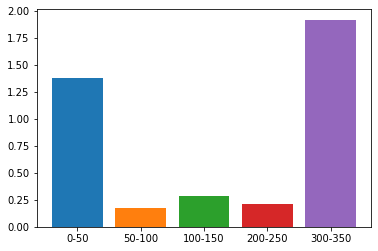

In [69]:
plt.bar("0-50", bins_groupby_df["reviews_per_month"][0])
plt.bar("50-100", bins_groupby_df["reviews_per_month"][1])
plt.bar("100-150", bins_groupby_df["reviews_per_month"][2])
plt.bar("200-250", bins_groupby_df["reviews_per_month"][4])
plt.bar("300-350", bins_groupby_df["reviews_per_month"][6])